# Recommender Systems 2017/18

### Practice 3 - Content Based recommenders


### Load the data you saw last time:

In [1]:
from urllib.request import urlretrieve
import zipfile

# skip the download
#urlretrieve ("http://files.grouplens.org/datasets/movielens/ml-10m.zip", "movielens_10m.zip")
#dataFile = zipfile.ZipFile("movielens_10m.zip")
URM_path = "ml-10M100K/ratings.dat"
URM_file = open(URM_path, 'r')


def rowSplit (rowString):
    
    split = rowString.split("::")
    split[3] = split[3].replace("\n","")
    
    split[0] = int(split[0])
    split[1] = int(split[1])
    split[2] = float(split[2])
    split[3] = int(split[3])
    
    result = tuple(split)
    
    return result


URM_file.seek(0)
URM_tuples = []

for line in URM_file:
   URM_tuples.append(rowSplit (line))

userList, itemList, ratingList, timestampList = zip(*URM_tuples)

userList = list(userList)
itemList = list(itemList)
ratingList = list(ratingList)
timestampList = list(timestampList)

import scipy.sparse as sps

URM_all = sps.coo_matrix((ratingList, (userList, itemList)))
URM_all = URM_all.tocsr()

URM_all

<71568x65134 sparse matrix of type '<class 'numpy.float64'>'
	with 10000054 stored elements in Compressed Sparse Row format>

## And now load the content informations in the same way:
## In this case we are using tags

In [3]:
ICM_path = "ml-10M100K/tags.dat"
ICM_file = open(ICM_path, 'r')

def rowSplit (rowString):
    split = rowString.split("::")
    split[3] = split[3].replace("\n","")
    
    split[0] = int(split[0])
    split[1] = int(split[1])
    split[2] = str(split[2]) # tag is a string, not a float like the rating
    split[3] = int(split[3])
    
    result = tuple(split)
    
    return result

ICM_file.seek(0)
ICM_tuples = []

for line in ICM_file:
    ICM_tuples.append(rowSplit(line))
    
userList_icm, itemList_icm, tagList_icm, timestampList_icm = zip(*ICM_tuples)

userList_icm = list(userList_icm)
itemList_icm = list(itemList_icm)
tagList_icm = list(tagList_icm)
timestampList_icm = list(timestampList_icm)

userList_unique = list(set(userList_icm))
itemList_unique = list(set(itemList_icm))
tagList_unique = list(set(tagList_icm))

numUsers = len(userList_unique)
numItems = len(itemList_unique)
numTags = len(tagList_unique)


print ("Number of items\t {}, Number of users\t {}".format(numItems, numUsers))
print ("Number of tags\t {}, Number of item-tag tuples {}".format(numTags, len(tagList_icm)))

print("\nData example:")
print(userList_icm[0:10])
print(itemList_icm[0:10])
print(tagList_icm[0:10])

Number of items	 7601, Number of users	 4009
Number of tags	 16529, Number of item-tag tuples 95580

Data example:
[15, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[4973, 1747, 1747, 2424, 2424, 2424, 2947, 2947, 3033, 3033]
['excellent!', 'politics', 'satire', 'chick flick 212', 'hanks', 'ryan', 'action', 'bond', 'spoof', 'star wars']


In [12]:
userList_unique

[8194,
 16389,
 15,
 24592,
 8209,
 20,
 21,
 32791,
 8216,
 25,
 8217,
 32792,
 57374,
 31,
 32,
 16419,
 57380,
 39,
 41000,
 16425,
 41002,
 16428,
 32812,
 48,
 49,
 24634,
 65595,
 32828,
 32831,
 65599,
 24641,
 32835,
 41027,
 65607,
 65610,
 75,
 57420,
 24653,
 78,
 16462,
 32848,
 49236,
 8282,
 24668,
 32861,
 8286,
 16485,
 57446,
 65637,
 8296,
 41066,
 109,
 8302,
 41070,
 65647,
 49265,
 57458,
 49270,
 24695,
 57464,
 49276,
 127,
 8321,
 57475,
 24708,
 133,
 65667,
 65669,
 41103,
 146,
 147,
 32919,
 49308,
 49309,
 65692,
 32931,
 57512,
 170,
 41130,
 175,
 49329,
 65713,
 181,
 16565,
 49334,
 8381,
 190,
 16574,
 49342,
 41154,
 57546,
 16587,
 16591,
 16592,
 49361,
 32978,
 49365,
 8409,
 24793,
 41178,
 49370,
 32989,
 222,
 57561,
 16610,
 32997,
 8423,
 24807,
 233,
 49383,
 24815,
 240,
 33008,
 8434,
 41201,
 249,
 57606,
 267,
 65805,
 8463,
 41234,
 57620,
 24853,
 41238,
 16664,
 283,
 284,
 8477,
 33052,
 41249,
 16677,
 24870,
 57637,
 49449,
 41258,


### The numbers of items and users in the ICM matrix is different from what we saw in the URM, why?

### The tags are string, we should traslate them into numbers so we can use them as indices in the ICM

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(tagList_icm)

tagList_icm = le.transform(tagList_icm)

print(tagList_icm[0:10])

[ 9814 13375 14131  8515 10769 14070  7015  8071 14829 14900]


# We can now build the ICM

In [5]:
import numpy as np
ones = np.ones(len(tagList_icm))
ICM_all = sps.coo_matrix((ones, (itemList_icm, tagList_icm)))
ICM_all = ICM_all.tocsr()

ICM_all

<65131x16529 sparse matrix of type '<class 'numpy.float64'>'
	with 71155 stored elements in Compressed Sparse Row format>

### Ouch, we need to add three empty items (why?):

In [6]:
missing_items = np.zeros((3, numTags))
missing_items = sps.csr_matrix(missing_items)
ICM_all = sps.vstack((ICM_all, missing_items))
ICM_all

<65134x16529 sparse matrix of type '<class 'numpy.float64'>'
	with 71155 stored elements in Compressed Sparse Row format>

# Let's take a look at the ICM

In [7]:
features_per_item = (ICM_all > 0).sum(axis=1)
items_per_feature = (ICM_all > 0).sum(axis=0)

print(features_per_item.shape)
print(items_per_feature.shape)

(65134, 1)
(1, 16529)


In [8]:
features_per_item = np.array(features_per_item).squeeze()
items_per_feature = np.array(items_per_feature).squeeze()

print(features_per_item.shape)
print(items_per_feature.shape)

(65134,)
(16529,)


In [9]:
features_per_item = np.sort(features_per_item)
items_per_feature = np.sort(items_per_feature)

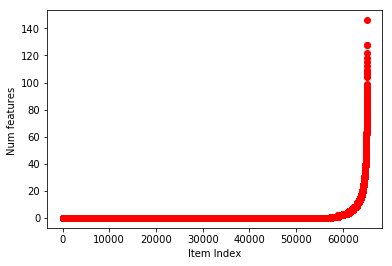

In [10]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(features_per_item, 'ro')
pyplot.ylabel('Num features ')
pyplot.xlabel('Item Index')
pyplot.show()

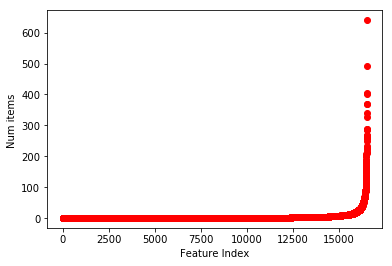

In [11]:
pyplot.plot(items_per_feature, 'ro')
pyplot.ylabel('Num items ')
pyplot.xlabel('Feature Index')
pyplot.show()

# We can now build the recommender algorithm, but first we need the train/test split and the evaluation function:

In [13]:
train_test_split = 0.80

numInteractions = URM_all.nnz


train_mask = np.random.choice([True,False], numInteractions, [train_test_split, 1-train_test_split])

userList = np.array(userList)
itemList = np.array(itemList)
ratingList = np.array(ratingList)


URM_train = sps.coo_matrix((ratingList[train_mask], (userList[train_mask], itemList[train_mask])))
URM_train = URM_train.tocsr()

test_mask = np.logical_not(train_mask)

URM_test = sps.coo_matrix((ratingList[test_mask], (userList[test_mask], itemList[test_mask])))
URM_test = URM_test.tocsr()

def precision(recommended_items, relevant_items):
    
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    
    precision_score = np.sum(is_relevant, dtype=np.float32) / len(is_relevant)
    
    return precision_score

def recall(recommended_items, relevant_items):
    
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    
    recall_score = np.sum(is_relevant, dtype=np.float32) / relevant_items.shape[0]
    
    return recall_score

def MAP(recommended_items, relevant_items):
   
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    
    # Cumulative sum: precision at 1, at 2, at 3 ...
    p_at_k = is_relevant * np.cumsum(is_relevant, dtype=np.float32) / (1 + np.arange(is_relevant.shape[0]))
    
    map_score = np.sum(p_at_k) / np.min([relevant_items.shape[0], is_relevant.shape[0]])

    return map_score

def evaluate_algorithm(URM_test, recommender_object, at=5):
    
    cumulative_precision = 0.0
    cumulative_recall = 0.0
    cumulative_MAP = 0.0
    
    num_eval = 0


    for i,user_id in  enumerate(userList_unique):
        
        if i % 500 == 0:
            print("User %d of %d" % (i, len(userList_unique)))

        relevant_items = URM_test[user_id].indices
        
        if len(relevant_items)>0:
            
            recommended_items = recommender_object.recommend(user_id, at=at)
            num_eval+=1

            cumulative_precision += precision(recommended_items, relevant_items)
            cumulative_recall += recall(recommended_items, relevant_items)
            cumulative_MAP += MAP(recommended_items, relevant_items)


    cumulative_precision /= num_eval
    cumulative_recall /= num_eval
    cumulative_MAP /= num_eval
    
    print("Recommender performance is: Precision = {:.4f}, Recall = {:.4f}, MAP = {:.4f}".format(
        cumulative_precision, cumulative_recall, cumulative_MAP))

In [14]:
class BasicItemKNNRecommender(object):
    """ ItemKNN recommender with cosine similarity and no shrinkage"""

    def __init__(self, URM, k=50, shrinkage=100, similarity='cosine'):
        self.dataset = URM
        self.k = k
        self.shrinkage = shrinkage
        self.similarity_name = similarity
        if similarity == 'cosine':
            self.distance = Cosine(shrinkage=self.shrinkage)
        elif similarity == 'pearson':
            self.distance = Pearson(shrinkage=self.shrinkage)
        elif similarity == 'adj-cosine':
            self.distance = AdjustedCosine(shrinkage=self.shrinkage)
        else:
            raise NotImplementedError('Distance {} not implemented'.format(similarity))

    def __str__(self):
        return "ItemKNN(similarity={},k={},shrinkage={})".format(
            self.similarity_name, self.k, self.shrinkage)

    def fit(self, X):
        item_weights = self.distance.compute(X)
        
        item_weights = check_matrix(item_weights, 'csr') # nearly 10 times faster
        print("Converted to csr")
        
        # for each column, keep only the top-k scored items
        # THIS IS THE SLOW PART, FIND A BETTER SOLUTION        
        values, rows, cols = [], [], []
        nitems = self.dataset.shape[1]
        for i in range(nitems):
            if (i % 10000 == 0):
                print("Item %d of %d" % (i, nitems))
                
            this_item_weights = item_weights[i,:].toarray()[0]
            top_k_idx = np.argsort(this_item_weights) [-self.k:]
                        
            values.extend(this_item_weights[top_k_idx])
            rows.extend(np.arange(nitems)[top_k_idx])
            cols.extend(np.ones(self.k) * i)
        self.W_sparse = sps.csc_matrix((values, (rows, cols)), shape=(nitems, nitems), dtype=np.float32)

    def recommend(self, user_id, at=None, exclude_seen=True):
        # compute the scores using the dot product
        user_profile = self.dataset[user_id]
        scores = user_profile.dot(self.W_sparse).toarray().ravel()

        # rank items
        ranking = scores.argsort()[::-1]
        if exclude_seen:
            ranking = self._filter_seen(user_id, ranking)
            
        return ranking[:at]
    
    def _filter_seen(self, user_id, ranking):
        user_profile = self.dataset[user_id]
        seen = user_profile.indices
        unseen_mask = np.in1d(ranking, seen, assume_unique=True, invert=True)
        return ranking[unseen_mask]

# We need to define Cosine similarity:

In [15]:
def check_matrix(X, format='csc', dtype=np.float32):
    if format == 'csc' and not isinstance(X, sps.csc_matrix):
        return X.tocsc().astype(dtype)
    elif format == 'csr' and not isinstance(X, sps.csr_matrix):
        return X.tocsr().astype(dtype)
    elif format == 'coo' and not isinstance(X, sps.coo_matrix):
        return X.tocoo().astype(dtype)
    elif format == 'dok' and not isinstance(X, sps.dok_matrix):
        return X.todok().astype(dtype)
    elif format == 'bsr' and not isinstance(X, sps.bsr_matrix):
        return X.tobsr().astype(dtype)
    elif format == 'dia' and not isinstance(X, sps.dia_matrix):
        return X.todia().astype(dtype)
    elif format == 'lil' and not isinstance(X, sps.lil_matrix):
        return X.tolil().astype(dtype)
    else:
        return X.astype(dtype)

In [16]:
import scipy
class ISimilarity(object):
    """Abstract interface for the similarity metrics"""

    def __init__(self, shrinkage=10):
        self.shrinkage = shrinkage

    def compute(self, X):
        pass


class Cosine(ISimilarity):
    def compute(self, X):
        # convert to csc matrix for faster column-wise operations
        X = check_matrix(X, 'csc', dtype=np.float32)

        # 1) normalize the columns in X
        # compute the column-wise norm
        # NOTE: this is slightly inefficient. We must copy X to compute the column norms.
        # A faster solution is to  normalize the matrix inplace with a Cython function.
        Xsq = X.copy()
        Xsq.data **= 2
        norm = np.sqrt(Xsq.sum(axis=0))
        norm = np.asarray(norm).ravel()
        norm += 1e-6
        # compute the number of non-zeros in each column
        # NOTE: this works only if X is instance of sparse.csc_matrix
        col_nnz = np.diff(X.indptr)
        # then normalize the values in each column
        X.data /= np.repeat(norm, col_nnz)
        print("Normalized")

        # 2) compute the cosine similarity using the dot-product
        dist = X * X.T
        print("Computed")
        
        # zero out diagonal values
        dist = dist - sps.dia_matrix((dist.diagonal()[scipy.newaxis, :], [0]), shape=dist.shape)
        print("Removed diagonal")
        
        # and apply the shrinkage
        if self.shrinkage > 0:
            dist = self.apply_shrinkage(X, dist)
            print("Applied shrinkage")    
        
        return dist

    def apply_shrinkage(self, X, dist):
        # create an "indicator" version of X (i.e. replace values in X with ones)
        X_ind = X.copy()
        X_ind.data = np.ones_like(X_ind.data)
        # compute the co-rated counts
        co_counts = X_ind * X_ind.T
        # remove the diagonal
        co_counts = co_counts - sps.dia_matrix((co_counts.diagonal()[scipy.newaxis, :], [0]), shape=co_counts.shape)
        # compute the shrinkage factor as co_counts_ij / (co_counts_ij + shrinkage)
        # then multiply dist with it
        co_counts_shrink = co_counts.copy()
        co_counts_shrink.data += self.shrinkage
        co_counts.data /= co_counts_shrink.data
        dist.data *= co_counts.data
        return dist


In [17]:
row = [0,5,2,6,8,6,7,5,2,2]
col = [0,4,5,2,2,5,3,2,4,1]
interaction = [1,1,1,1,1,1,1,1,1,1]

In [18]:
test = sps.coo_matrix((interaction, (row, col)))
test = test.tocsr()

In [19]:
test.todense()

matrix([[1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 0, 1],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0]], dtype=int64)

In [26]:
test[2].indices

array([1, 4, 5], dtype=int32)

## Test it:

In [ ]:
rec = BasicItemKNNRecommender(URM=URM_train, shrinkage=0.0, k=50)
rec.fit(ICM_all)

In [ ]:
for user_id in userList_unique[0:10]:
    print(rec.recommend(user_id, at=5))

In [ ]:
evaluate_algorithm(URM_test, rec)

# Shrinkage

In [ ]:
rec_s = BasicItemKNNRecommender(URM=URM_train, shrinkage=10.0, k=50)
rec_s.fit(ICM_all)
evaluate_algorithm(URM_test, rec_s)

# IDF

In [ ]:
num_tot_items = ICM_all.shape[0]

# let's count how many items have a certain feature
items_per_feature = (ICM_all > 0).sum(axis=0)

IDF = np.array(np.log(num_tot_items / items_per_feature))[0]

print(ICM_all.shape)
print(IDF.shape)

In [ ]:
ICM_idf = ICM_all.copy()
# compute the number of non-zeros in each col
# NOTE: this works only if X is instance of sparse.csc_matrix
col_nnz = np.diff(check_matrix(ICM_idf, 'csc').indptr)
print(col_nnz.shape)
print(ICM_idf.shape)
print(IDF.shape)
# then normalize the values in each col
ICM_idf.data *= np.repeat(IDF, col_nnz)

In [ ]:
rec_idf = BasicItemKNNRecommender(URM=URM_train, shrinkage=0.0, k=50)
rec_idf.fit(ICM_idf)
evaluate_algorithm(URM_test, rec_idf)

# Unnormalized similarity matrix

In [ ]:
rec_test = BasicItemKNNRecommender(URM=URM_train, shrinkage=0.0, k=50)
rec_test.W_sparse = ICM_all * ICM_all.T
evaluate_algorithm(URM_test, rec_test)